In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [44]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv('magic04.data', names = cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [45]:
tepri = df['class'].unique()
print(tepri)
print("G = Gamma H = Hadron")

['g' 'h']
G = Gamma H = Hadron


In [46]:
df['class'] = (df['class'] == 'g').astype(int)

In [47]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


## ...

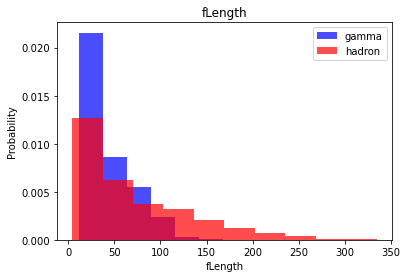

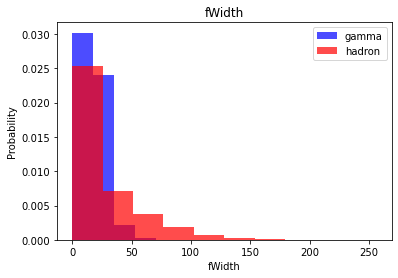

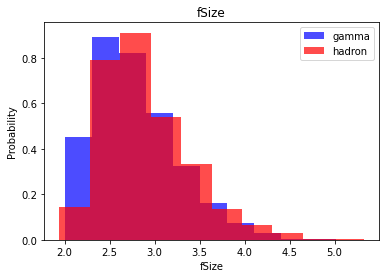

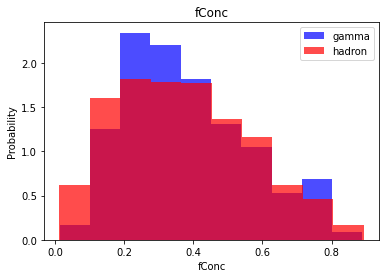

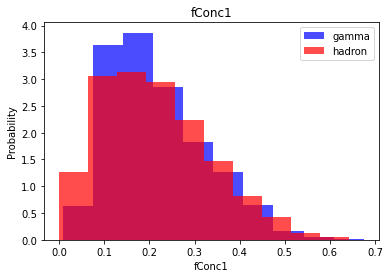

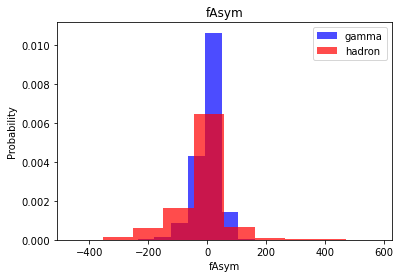

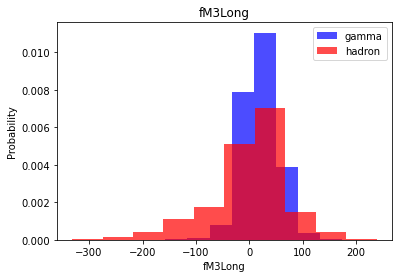

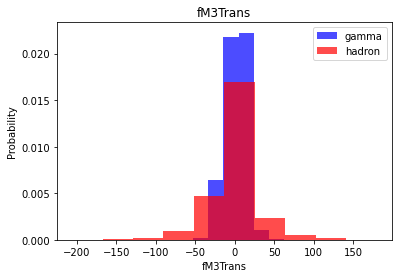

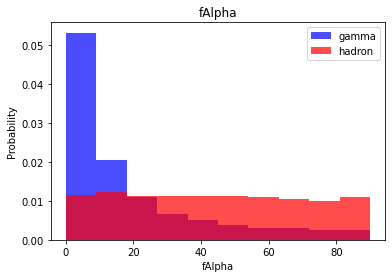

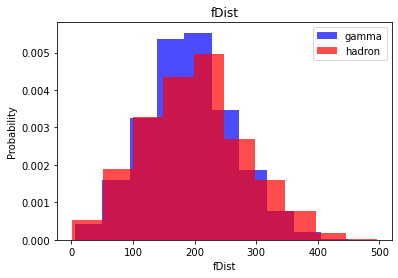

In [48]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color ='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color ='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()
    

## Train, Validation, test datasets

In [49]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [50]:
def scale_dataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X,y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [51]:
print(len(train[train["class"]==1])) # gamma
print(len(train[train["class"]==0])) # hadron

7438
3974


In [52]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=True)

In [53]:
len(y_train)

14876

## kNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [55]:
knn_model = KNeighborsClassifier(n_neighbors =5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [56]:
y_pred = knn_model.predict(X_test)

In [57]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79      2446
           1       0.76      0.87      0.81      2446

    accuracy                           0.80      4892
   macro avg       0.81      0.80      0.80      4892
weighted avg       0.81      0.80      0.80      4892



## Naive Bayes

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [61]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.41      0.54      2446
           1       0.60      0.91      0.73      2446

    accuracy                           0.66      4892
   macro avg       0.71      0.66      0.63      4892
weighted avg       0.71      0.66      0.63      4892



## Log Regression

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [64]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      2446
           1       0.75      0.83      0.79      2446

    accuracy                           0.78      4892
   macro avg       0.78      0.78      0.78      4892
weighted avg       0.78      0.78      0.78      4892



## SVM

In [65]:
from sklearn.svm import SVC

In [66]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [67]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      2446
           1       0.82      0.90      0.86      2446

    accuracy                           0.85      4892
   macro avg       0.86      0.85      0.85      4892
weighted avg       0.86      0.85      0.85      4892



Prosesing agak lama

## Neural Net

In [75]:
import tensorflow as tf

In [76]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)
    
    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax1.grid(True)

    plt.show()



In [77]:
def train_model(X_train, y_train, num_nodes, dropout_prob, ir, batch_size, epochs):

    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape = (10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(ir),loss='binary_crossentropy', metrics=['accuracy'])

    # nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy', metrics=['accurarcy'])

    history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split = 0.2, verbose=0
    )
    return nn_model, history

In [78]:
# plot_loss(history)
# plot_accuracy(history)

16 nodes, dropout 0, ir 0.01, batch size 32


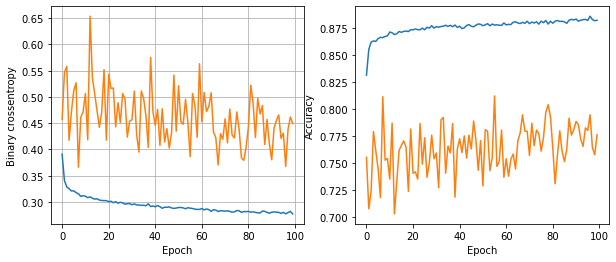

153/153 [==============================] - 0s 2ms/step - loss: 0.4126 - accuracy: 0.8317
16 nodes, dropout 0, ir 0.01, batch size 64


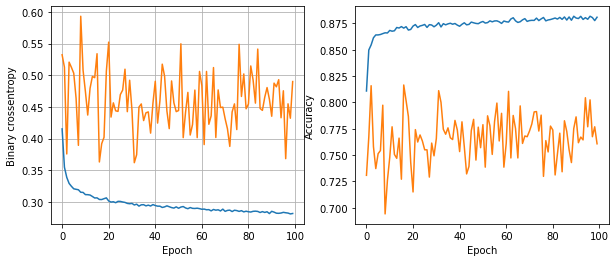

153/153 [==============================] - 0s 2ms/step - loss: 0.3976 - accuracy: 0.8329
16 nodes, dropout 0, ir 0.01, batch size 128


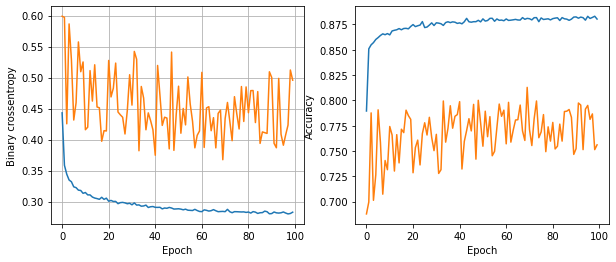

153/153 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.8307
16 nodes, dropout 0, ir 0.005, batch size 32


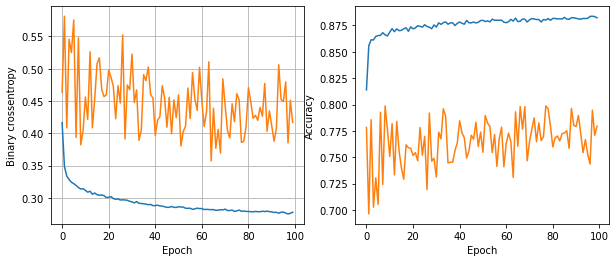

153/153 [==============================] - 0s 1ms/step - loss: 0.3757 - accuracy: 0.8515
16 nodes, dropout 0, ir 0.005, batch size 64


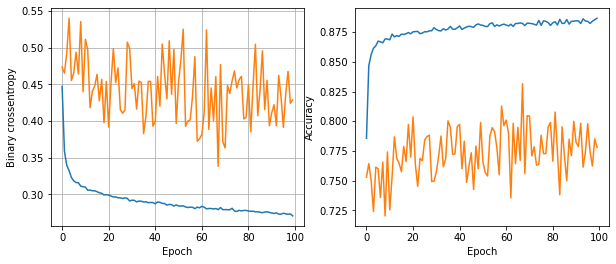

153/153 [==============================] - 0s 2ms/step - loss: 0.3758 - accuracy: 0.8440
16 nodes, dropout 0, ir 0.005, batch size 128


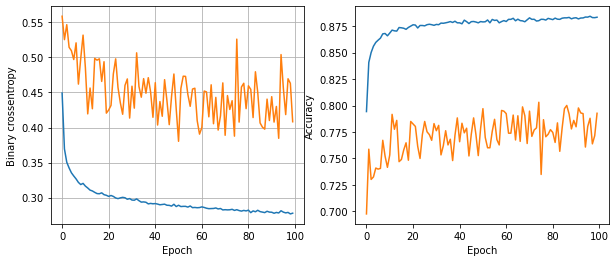

153/153 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8399
16 nodes, dropout 0, ir 0.001, batch size 32


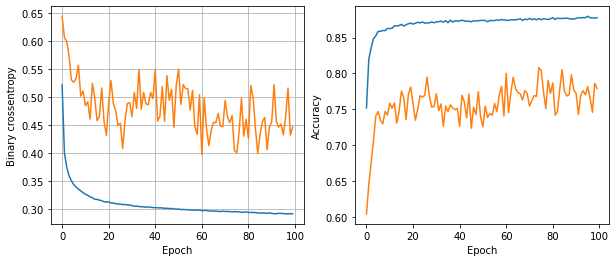

153/153 [==============================] - 0s 2ms/step - loss: 0.3722 - accuracy: 0.8376
16 nodes, dropout 0, ir 0.001, batch size 64


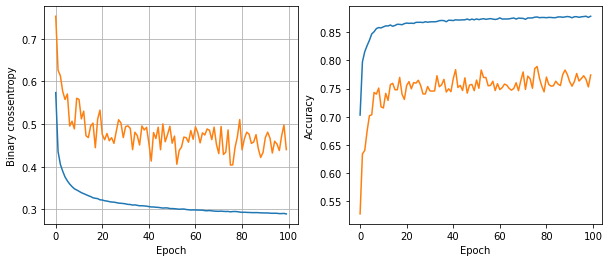

153/153 [==============================] - 0s 2ms/step - loss: 0.3594 - accuracy: 0.8386
16 nodes, dropout 0, ir 0.001, batch size 128


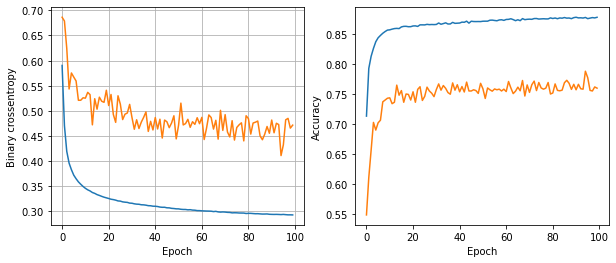

153/153 [==============================] - 0s 2ms/step - loss: 0.3703 - accuracy: 0.8384
16 nodes, dropout 0.2, ir 0.01, batch size 32


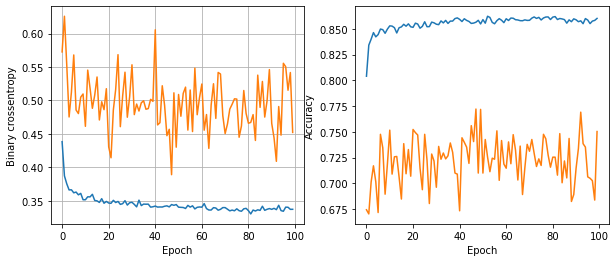

153/153 [==============================] - 0s 2ms/step - loss: 0.3717 - accuracy: 0.8301
16 nodes, dropout 0.2, ir 0.01, batch size 64


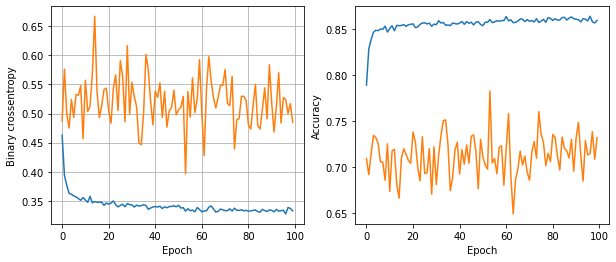

153/153 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8360
16 nodes, dropout 0.2, ir 0.01, batch size 128


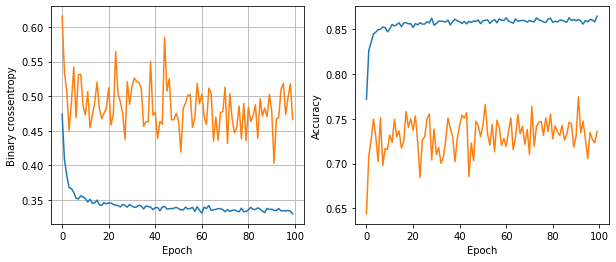

153/153 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8268
16 nodes, dropout 0.2, ir 0.005, batch size 32


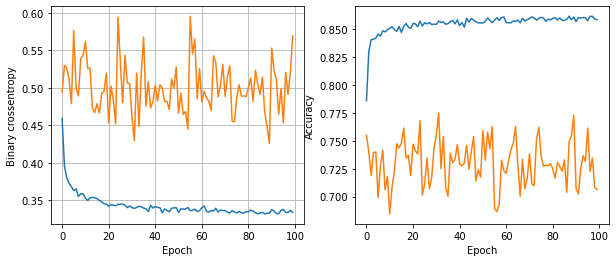

153/153 [==============================] - 0s 1ms/step - loss: 0.4006 - accuracy: 0.8213
16 nodes, dropout 0.2, ir 0.005, batch size 64


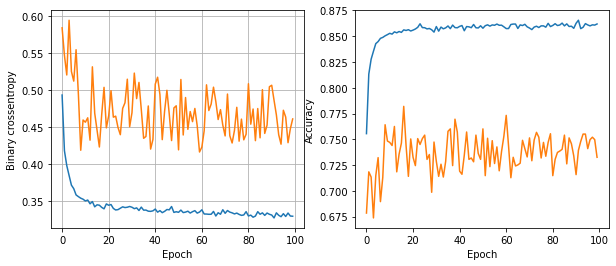

153/153 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.8295
16 nodes, dropout 0.2, ir 0.005, batch size 128


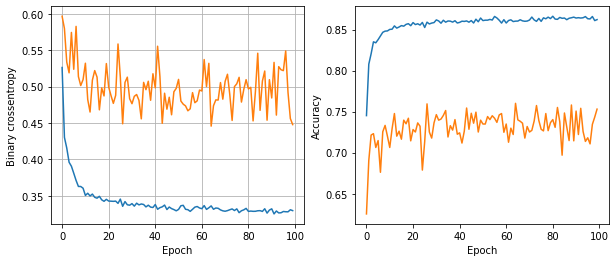

153/153 [==============================] - 0s 2ms/step - loss: 0.3724 - accuracy: 0.8317
16 nodes, dropout 0.2, ir 0.001, batch size 32


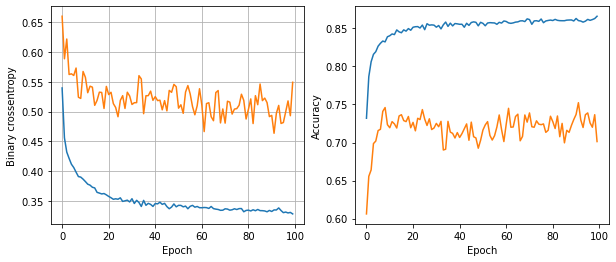

153/153 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8239
16 nodes, dropout 0.2, ir 0.001, batch size 64


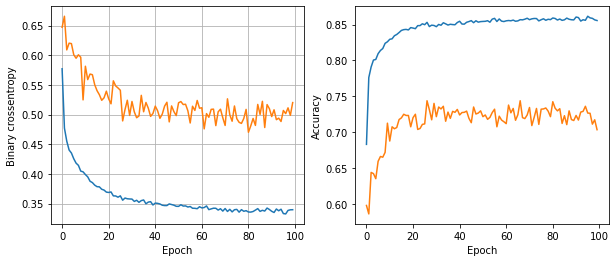

153/153 [==============================] - 0s 2ms/step - loss: 0.3833 - accuracy: 0.8164
16 nodes, dropout 0.2, ir 0.001, batch size 128


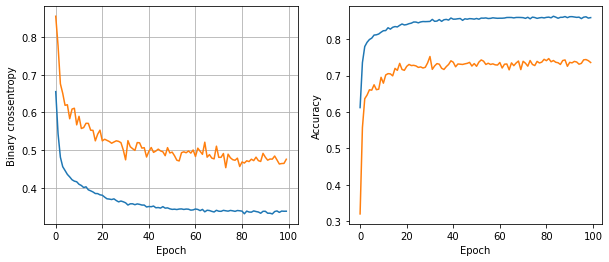

153/153 [==============================] - 0s 1ms/step - loss: 0.3670 - accuracy: 0.8319
32 nodes, dropout 0, ir 0.01, batch size 32


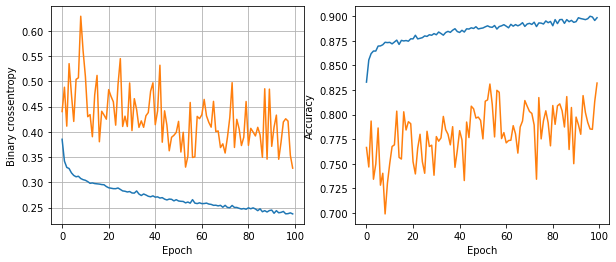

153/153 [==============================] - 0s 2ms/step - loss: 0.4343 - accuracy: 0.8417
32 nodes, dropout 0, ir 0.01, batch size 64


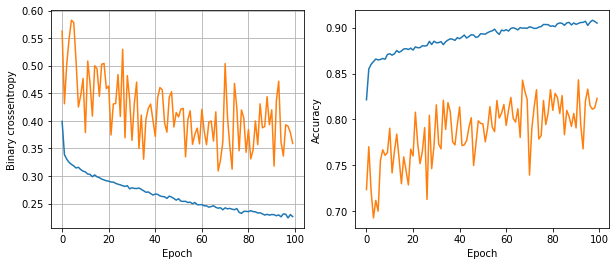

153/153 [==============================] - 0s 2ms/step - loss: 0.5126 - accuracy: 0.8317
32 nodes, dropout 0, ir 0.01, batch size 128


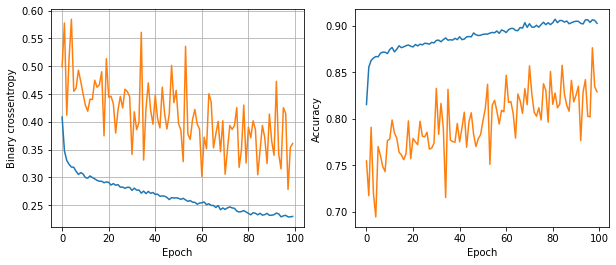

153/153 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 0.8262
32 nodes, dropout 0, ir 0.005, batch size 32


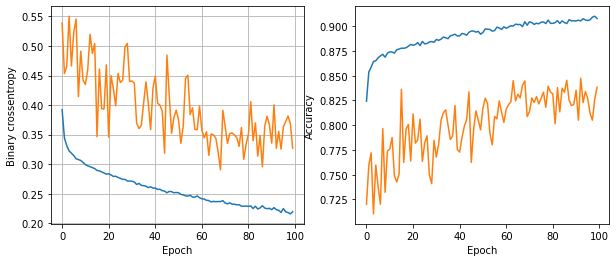

153/153 [==============================] - 0s 2ms/step - loss: 0.4349 - accuracy: 0.8427
32 nodes, dropout 0, ir 0.005, batch size 64


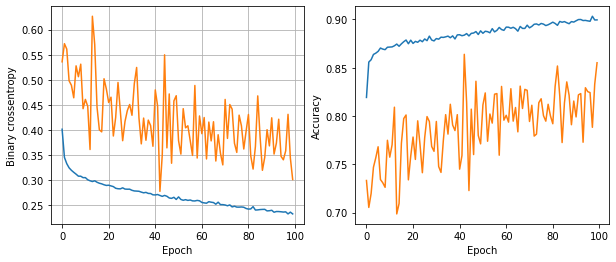

153/153 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.8301
32 nodes, dropout 0, ir 0.005, batch size 128


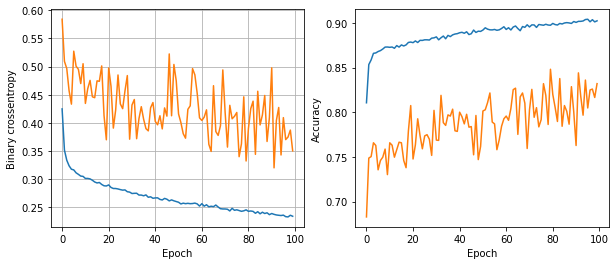

153/153 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.8448
32 nodes, dropout 0, ir 0.001, batch size 32


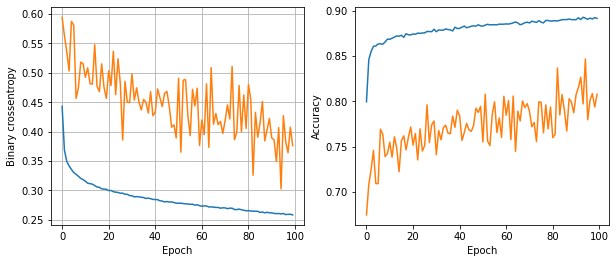

153/153 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8368
32 nodes, dropout 0, ir 0.001, batch size 64


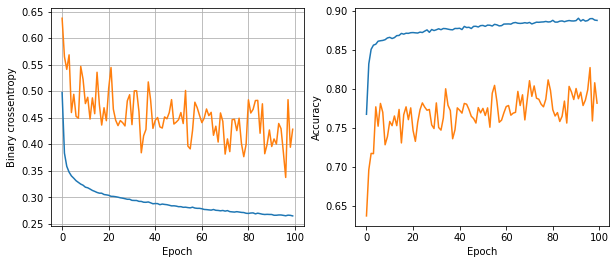

153/153 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8395
32 nodes, dropout 0, ir 0.001, batch size 128


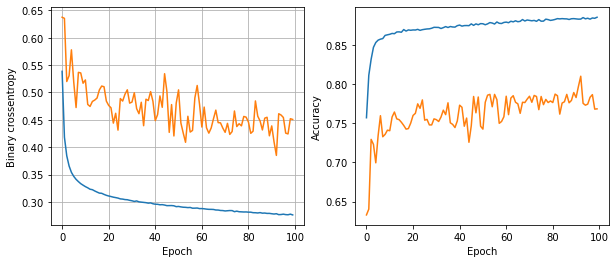

153/153 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8395
32 nodes, dropout 0.2, ir 0.01, batch size 32


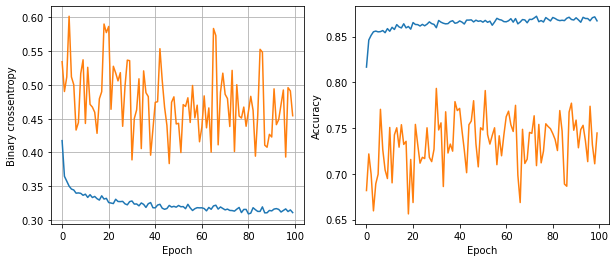

153/153 [==============================] - 0s 2ms/step - loss: 0.3744 - accuracy: 0.8303
32 nodes, dropout 0.2, ir 0.01, batch size 64


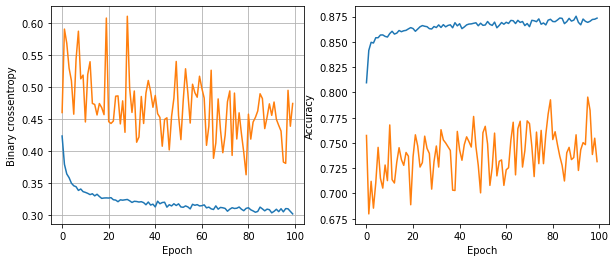

153/153 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8276
32 nodes, dropout 0.2, ir 0.01, batch size 128


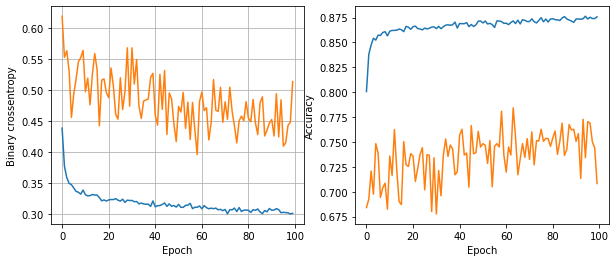

153/153 [==============================] - 0s 2ms/step - loss: 0.3859 - accuracy: 0.8188
32 nodes, dropout 0.2, ir 0.005, batch size 32


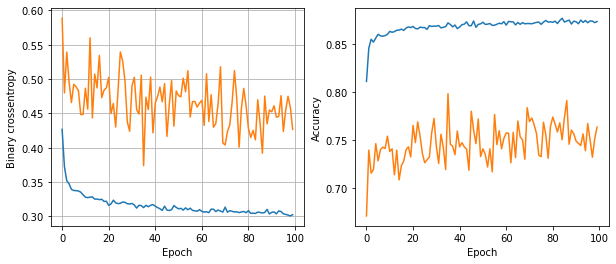

153/153 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8399
32 nodes, dropout 0.2, ir 0.005, batch size 64


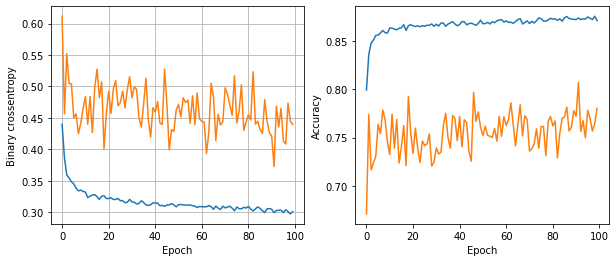

153/153 [==============================] - 0s 2ms/step - loss: 0.3678 - accuracy: 0.8413
32 nodes, dropout 0.2, ir 0.005, batch size 128


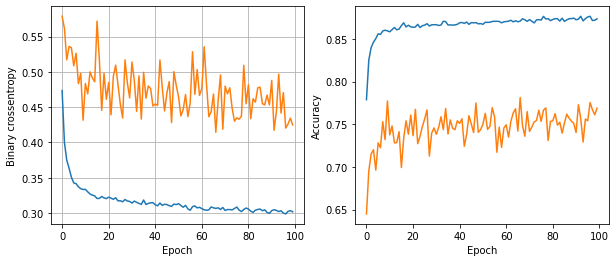

153/153 [==============================] - 0s 2ms/step - loss: 0.3643 - accuracy: 0.8403
32 nodes, dropout 0.2, ir 0.001, batch size 32


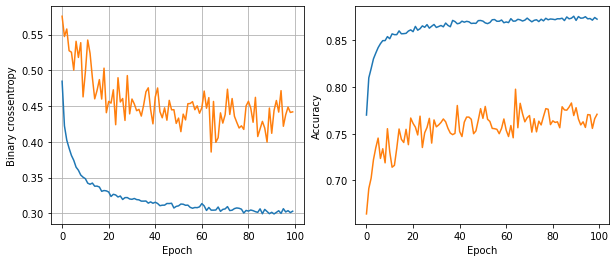

153/153 [==============================] - 0s 2ms/step - loss: 0.3707 - accuracy: 0.8368
32 nodes, dropout 0.2, ir 0.001, batch size 64


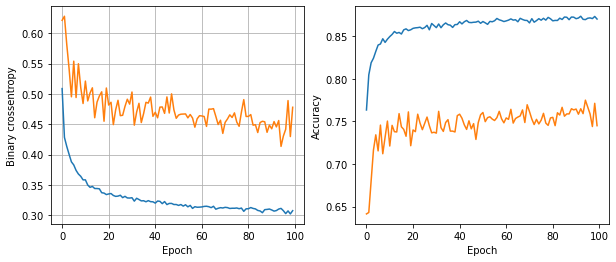

153/153 [==============================] - 0s 2ms/step - loss: 0.3708 - accuracy: 0.8376
32 nodes, dropout 0.2, ir 0.001, batch size 128


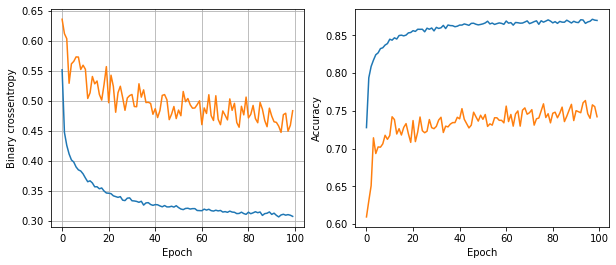

153/153 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.8325
64 nodes, dropout 0, ir 0.01, batch size 32


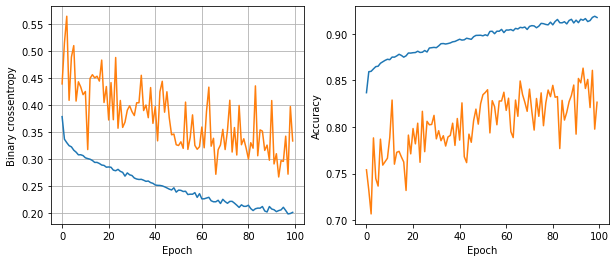

153/153 [==============================] - 0s 1ms/step - loss: 0.6608 - accuracy: 0.8268
64 nodes, dropout 0, ir 0.01, batch size 64


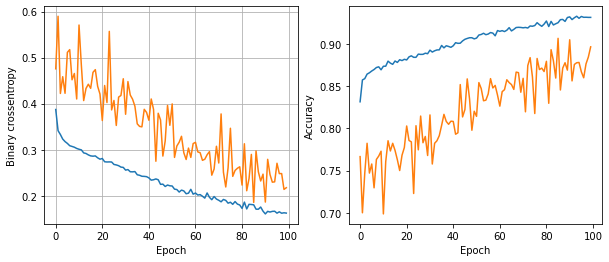

153/153 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.8243
64 nodes, dropout 0, ir 0.01, batch size 128


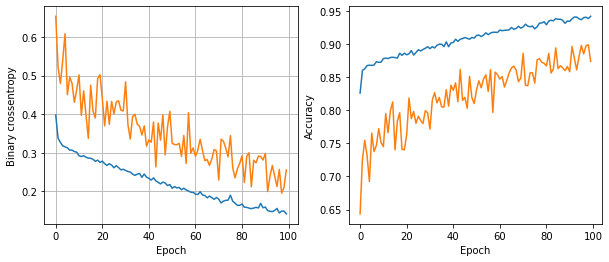

153/153 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.8346
64 nodes, dropout 0, ir 0.005, batch size 32


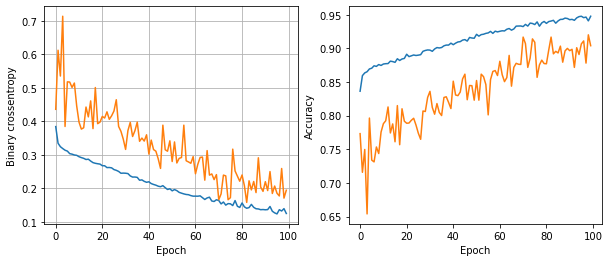

153/153 [==============================] - 0s 1ms/step - loss: 0.9145 - accuracy: 0.8286
64 nodes, dropout 0, ir 0.005, batch size 64


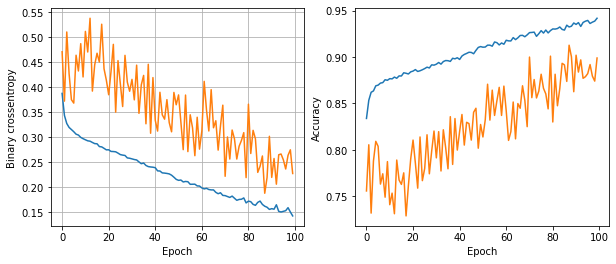

153/153 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.8233
64 nodes, dropout 0, ir 0.005, batch size 128


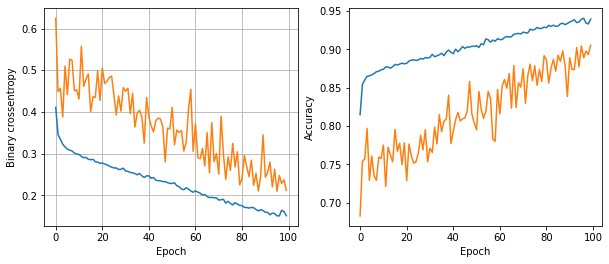

153/153 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.8325
64 nodes, dropout 0, ir 0.001, batch size 32


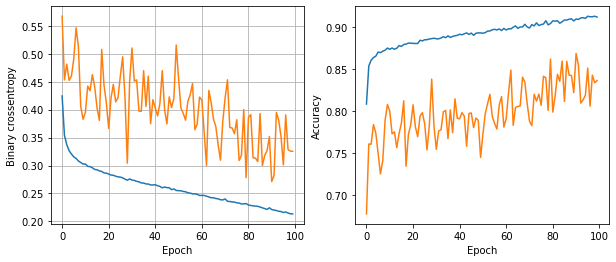

153/153 [==============================] - 0s 1ms/step - loss: 0.4148 - accuracy: 0.8339
64 nodes, dropout 0, ir 0.001, batch size 64


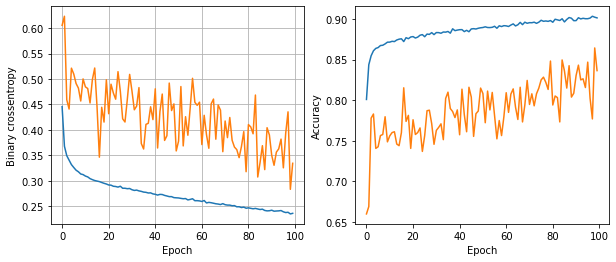

153/153 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8362
64 nodes, dropout 0, ir 0.001, batch size 128


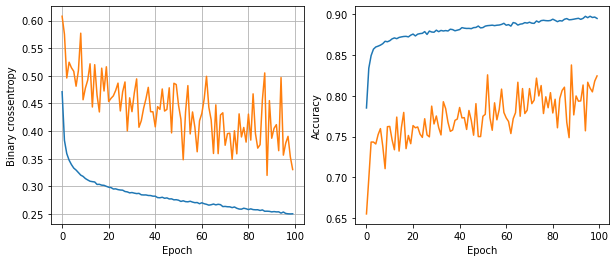

153/153 [==============================] - 0s 2ms/step - loss: 0.3598 - accuracy: 0.8433
64 nodes, dropout 0.2, ir 0.01, batch size 32


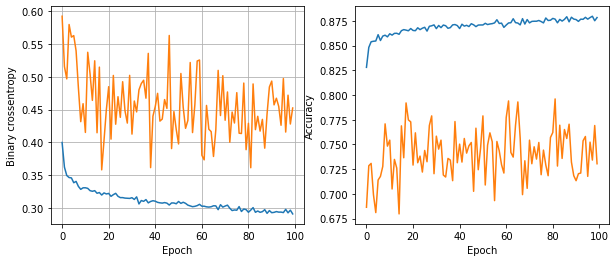

153/153 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8219
64 nodes, dropout 0.2, ir 0.01, batch size 64


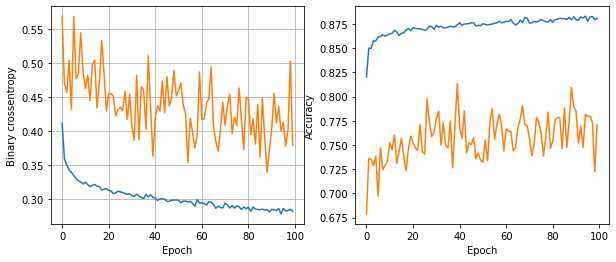

153/153 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8393
64 nodes, dropout 0.2, ir 0.01, batch size 128


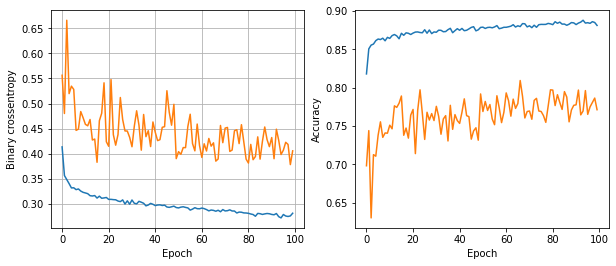

153/153 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8399
64 nodes, dropout 0.2, ir 0.005, batch size 32


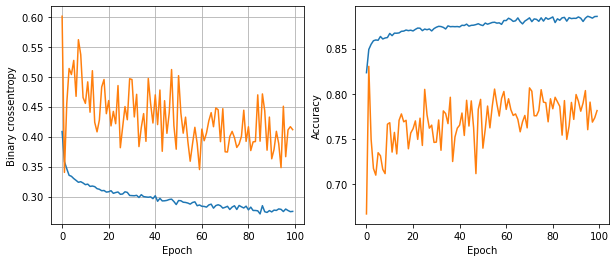

153/153 [==============================] - 0s 2ms/step - loss: 0.3936 - accuracy: 0.8358
64 nodes, dropout 0.2, ir 0.005, batch size 64


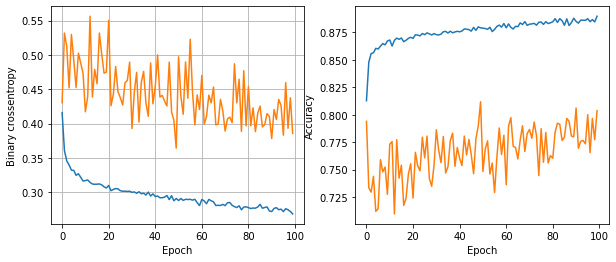

153/153 [==============================] - 0s 2ms/step - loss: 0.3698 - accuracy: 0.8419
64 nodes, dropout 0.2, ir 0.005, batch size 128


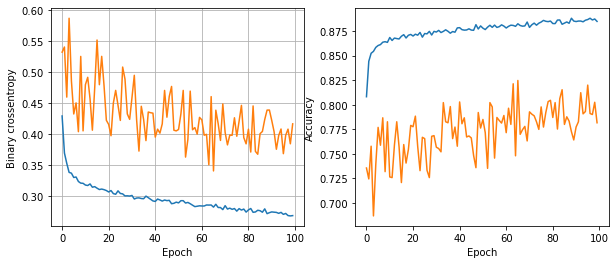

153/153 [==============================] - 0s 2ms/step - loss: 0.3866 - accuracy: 0.8456
64 nodes, dropout 0.2, ir 0.001, batch size 32


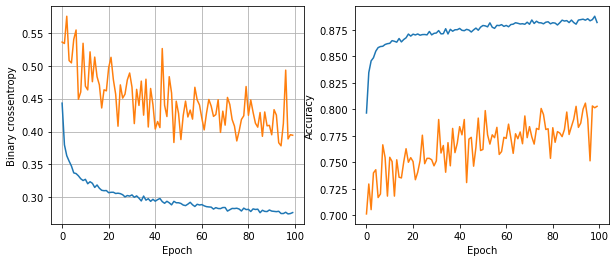

153/153 [==============================] - 0s 2ms/step - loss: 0.3696 - accuracy: 0.8468
64 nodes, dropout 0.2, ir 0.001, batch size 64


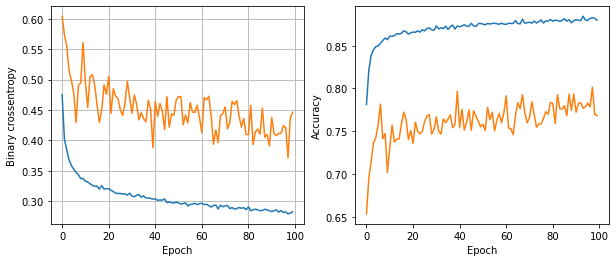

153/153 [==============================] - 0s 2ms/step - loss: 0.3665 - accuracy: 0.8470
64 nodes, dropout 0.2, ir 0.001, batch size 128


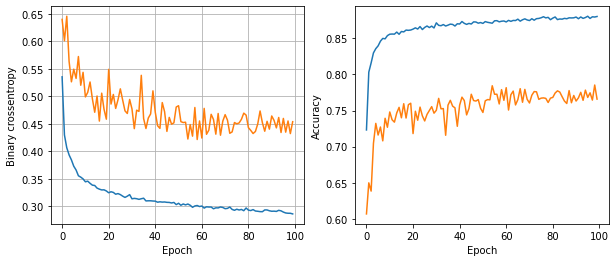

153/153 [==============================] - 0s 2ms/step - loss: 0.3661 - accuracy: 0.8446


In [80]:
least_val_loss = float('inf')
least_loss_model = None

epochs=100
for num_nodes in [16,32,64]:
    for dropout_prob in[0, 0.2]:
        for ir in [0.01, 0.005, 0.001]:
            for batch_size in [32,64, 128]:
                print(f'{num_nodes} nodes, dropout {dropout_prob}, ir {ir}, batch size {batch_size}')
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, ir, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [81]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1, 1)

153/153 [==============================] - 0s 1ms/step


In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.75      0.83      2446
           1       0.79      0.94      0.86      2446

    accuracy                           0.85      4892
   macro avg       0.86      0.85      0.84      4892
weighted avg       0.86      0.85      0.84      4892

